#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv(r'C:\Users\PC\Desktop\progect\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1

In [3]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}\n")

data_types = df.dtypes
print("Data types of each column:")
print(data_types)

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

numeric_columns = ['BasePay', 'OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df[numeric_columns] = df[numeric_columns].applymap(lambda x: max(0, x))


df.to_csv('Modified.csv', index=False)

Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Task 2

In [4]:
basic_stats = df.describe()

print(basic_stats)


salary_mode = df['TotalPay'].mode()

print(salary_mode)


salary_range = df['TotalPay'].max() - df['TotalPay'].min()

print(salary_range)


salary_std_dev = df['TotalPay'].std()

print(salary_std_dev)
df.to_csv('Modified.csv', index=False)

                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148654.000000  148654.000000  148654.000000   
mean    74327.500000   66053.735754    5065.923568    3648.721474   
std     42912.857795   42886.701191   11454.256594    8056.471027   
min         1.000000       0.000000       0.000000       0.000000   
25%     37164.250000   32792.545000       0.000000       0.000000   
50%     74327.500000   64861.600000       0.000000     811.170000   
75%    111490.750000   94605.740000    4657.632500    4235.907500   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  148654.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    18924.233233   74768.326130      93692.559270    2012.522643    NaN   
std     17165.279060   50516.999094      62793.526808       1.117538    NaN   
min         0.000000       0.000000          0.000000    2011.

# Task 3

In [5]:
column1_mean = df['BasePay'].mean()
column2_mean = df['OvertimePay'].mean()
column3_mean = df['OtherPay'].mean()
column4_mean = df['Benefits'].mean()
column5_mean = df['TotalPay'].mean()
column6_mean = df['TotalPayBenefits'].mean()
#BasePay	OvertimePay	OtherPay	Benefits	TotalPay	TotalPayBenefits

df['BasePay'].fillna(column1_mean, inplace=True)
df['OvertimePay'].fillna(column2_mean, inplace=True)
df['OtherPay'].fillna(column3_mean, inplace=True)
df['Benefits'].fillna(column4_mean, inplace=True)
df['TotalPay'].fillna(column5_mean, inplace=True)
df['TotalPayBenefits'].fillna(column6_mean, inplace=True)
df.to_csv('Modified.csv', index=False)

**The reason :** Because it's a simple method that helps maintain the overall distribution of the data. Choose mean for normally distributed data, median for skewed data, and mode for categorical variables.

# Task 4

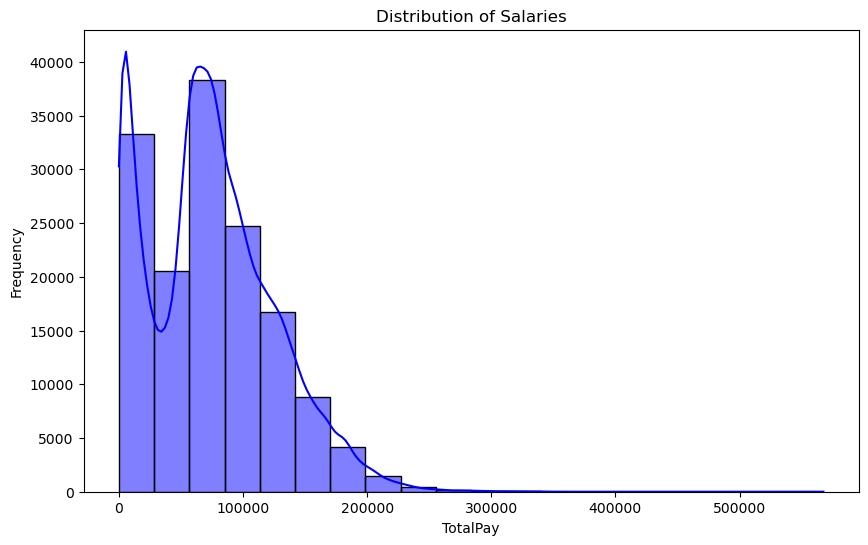

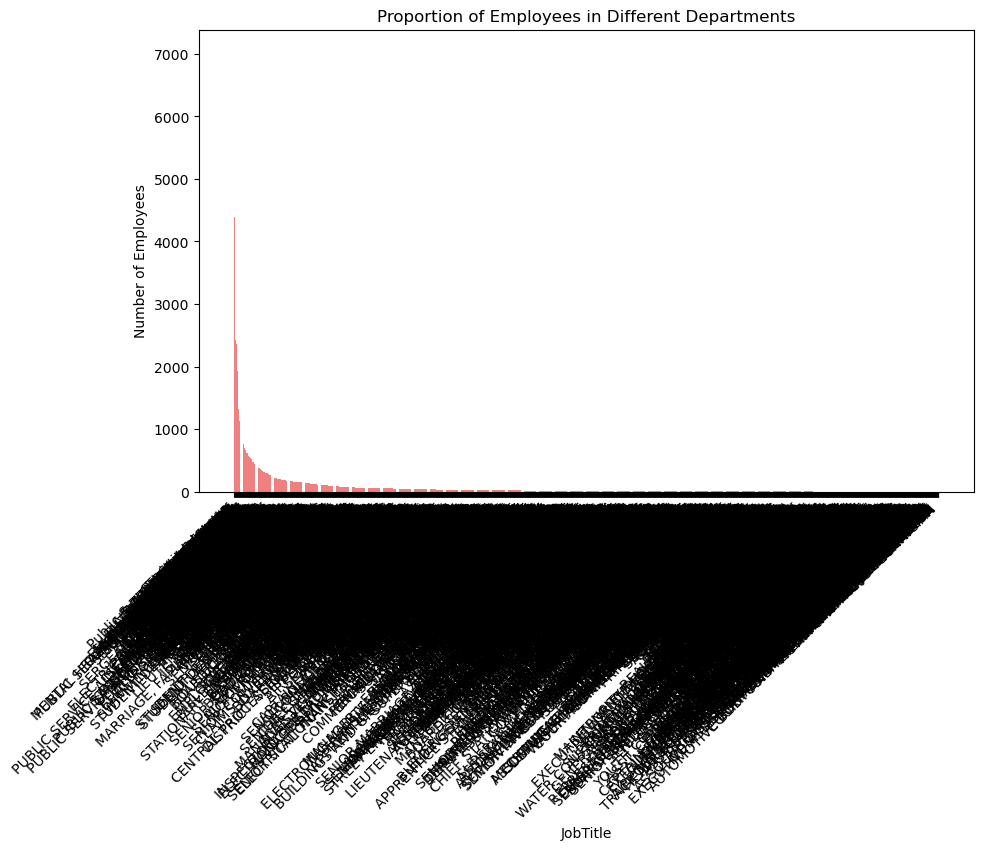

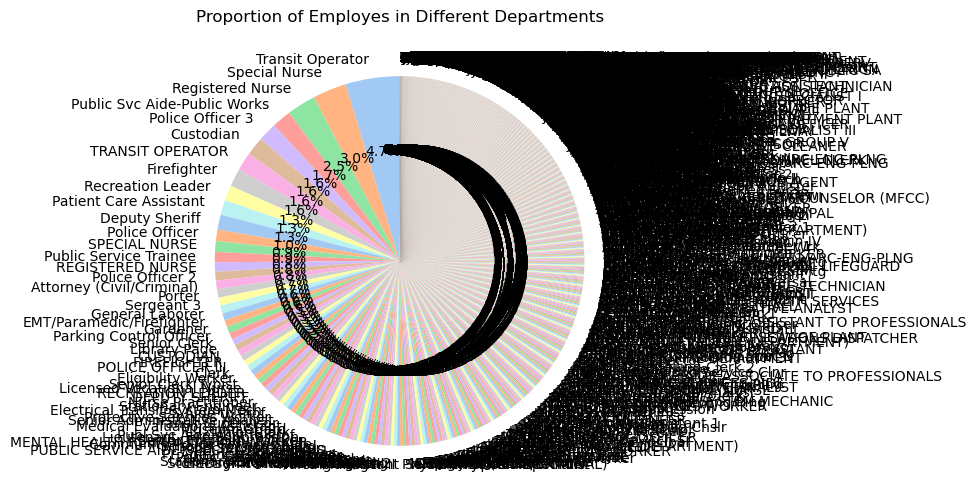

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=20, kde=True, color='red')
plt.title('Distribution of Salaries')
plt.xlabel('TotalPay')
plt.ylabel('Frequency') 
plt.show()

department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(department_counts.index, department_counts.values, color='purple')
plt.title('Proportion of Employees in Different Departments')
plt.xlabel('JobTitle')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to bacame easier to read
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employes in Different Departments')
plt.show()


# Task 5

In [14]:
grouped_data = df.groupby(['BasePay', 'OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits'])


summary_statistics = grouped_data.agg({
    'TotalPay': ['mean', 'count', 'min', 'max']
})


print(summary_statistics)


average_salary_comparison = summary_statistics['TotalPay']['mean']
print("\nAverage Salaries Across Different Groups:")
print(average_salary_comparison)


                                                                     TotalPay  \
                                                                         mean   
BasePay   OvertimePay OtherPay Benefits TotalPay  TotalPayBenefits              
0.00      0.00        0.00     0.00     0.00      0.00                   0.00   
                               12.90    0.00      12.90                  0.00   
                               30.48    0.00      30.48                  0.00   
                               57.06    0.00      57.06                  0.00   
                               73.32    0.00      73.32                  0.00   
...                                                                       ...   
313312.52 0.00        0.00     82319.51 313312.52 395632.03         313312.52   
313686.01 0.00        23236.00 85431.39 336922.01 422353.40         336922.01   
315572.01 0.00        0.00     82849.66 315572.01 398421.67         315572.01   
318835.49 10712.95    60563.

 # Task 6

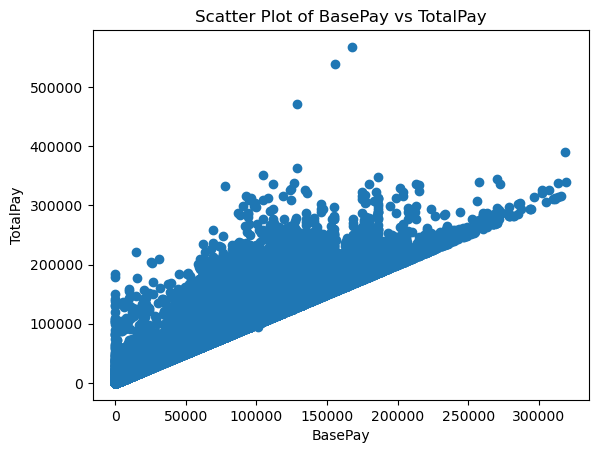


Correlation between BasePay and TotalPay: 0.9546925794739671


In [7]:
correlation = df['TotalPay'].corr(df['BasePay'])

# Plot a scatter plot to visualize the relationship
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('Scatter Plot of BasePay vs TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

# Display the correlation coefficient
print(f"\nCorrelation between BasePay and TotalPay: {correlation}")


# Task 7

**The Summry** : 

1]There is missing values in the columns (BaseDay,Benefits,Notes ,Status).

2]Missing values in the 'TotalPay' column were imputed using the mean of the column. This method was chosen because it is a common practice for numerical features like salary.

3]The data was grouped by job title, and average salaries for each group were calculated. This analysis reveals insights into salary variations across different job titles.

4]There are some negative values were imputed usind the number 0.

# Good Luck!